# Final Report

# Social Network Analysis Project: Report 1
# Exploring the *Titanic* dataset

## Introduction - *Unveiling Titanic's Social Fabric: A Network Analysis*

### Group F members
The minds behind this journey are: **Leonardo Azzi**, **Sofia Bruni**, **Francesca Romana Sanna**, **Alexandra Tabarani** and **Marta Torella**, five students of the Bachelor in Management and Computer Science.

Throughout the course weeks, we aim to not only visually represent these connections but also analyze them through various graph metrics.

In our project, the **characters** aboard the Titanic take center stage as *nodes*, while the *edges* connecting them represent **shared scenes**, their *weights* reflecting the **frequency** of these shared appearences.
This analytical approach allows us to decode the complex web of interactions that shaped the destinies of the movie characters.

Through meticulous examination, we will be able to uncover the characters as well as the patterns of connection that lie underneath the narrative.

*Join us as we sail through the Titanic's data!*

### Imports
We start by importing the necessary libraries for our analysis.

In [48]:
# Basic Imports with aliases
import numpy as np 
import matplotlib.pyplot as plt
import csv
import networkx as nx
from networkx.algorithms import community
from collections import deque
import pandas as pd
import time
import random

## Week 1: Networks
## *Introduction to Graph Creation and Basic Analysis*

### Objective
The primary objective this week was to construct a visual representation of a graph, representing the relationships and interactions among the characters in the Titanic dataset.

### Graph Construction
In our graphical illustration:
- **Nodes** represent individual *characters* in the movie
- **Edges** indicate the presence of a *shared scene* between two characters
- **Edge weights** reflect the *frequency* of these shared scenes

### Graph Analysis
We then analyzed the graph by determining some of its basic properties:
- **Total number of nodes and edges**: to understand the *scale and complexity* of the graph
- **Average degree**: computed using the formula $\frac{2E}{N}$, where $E$ stands for the total number of edges and $N$ is the number of nodes, giving an average of *connections per node*
- **Graph density**: calculated with $D = \frac{2E}{N \times (N-1)}$, where $D$ is the density, $E$ is the number of edges and $N$ is the number of nodes. This metric is useful to understand how many connections are present in the graph, compared to the maximum possible number of connections, hence providing an insight into the *overall connectivity*. The density of a graph can range from 0 to 1, with 0 indicating a graph with no edges and 1 a graph with the maximum number of edges.

### Insights gained
By computing these metrics, we were able to gain a better understanding of the graph's structure and complexity: we have a *weighted* and *undirected* graph, with 70 nodes and 299 edges. In particular, we obtained a foundational knowledge that will be expanded upon in the following weeks.

### Loading the **Graph** from the given CSV files

In [49]:
G = nx.Graph() # Create a graph

# Read nodes from *nodes.csv* file
with open('Project/Graph/nodes.csv', 'r') as file:       # Open the CSV file
    reader = csv.DictReader(file)                   # DictReader is a class that reads a CSV file and converts it into a dictionary
    for row in reader:                              # Iterate over the rows of the CSV file, each row is a dictionary
        G.add_node(row['Id'], label=row['Label'])   # Add a node to the graph with the node id and label

# Read edges from *edges.csv* file
with open('Project/Graph/edges.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        G.add_edge(row['Source'], row['Target'], weight=int(row['Weight'])) # Add an edge to the graph with the source, target and weight


### Plotting the graph

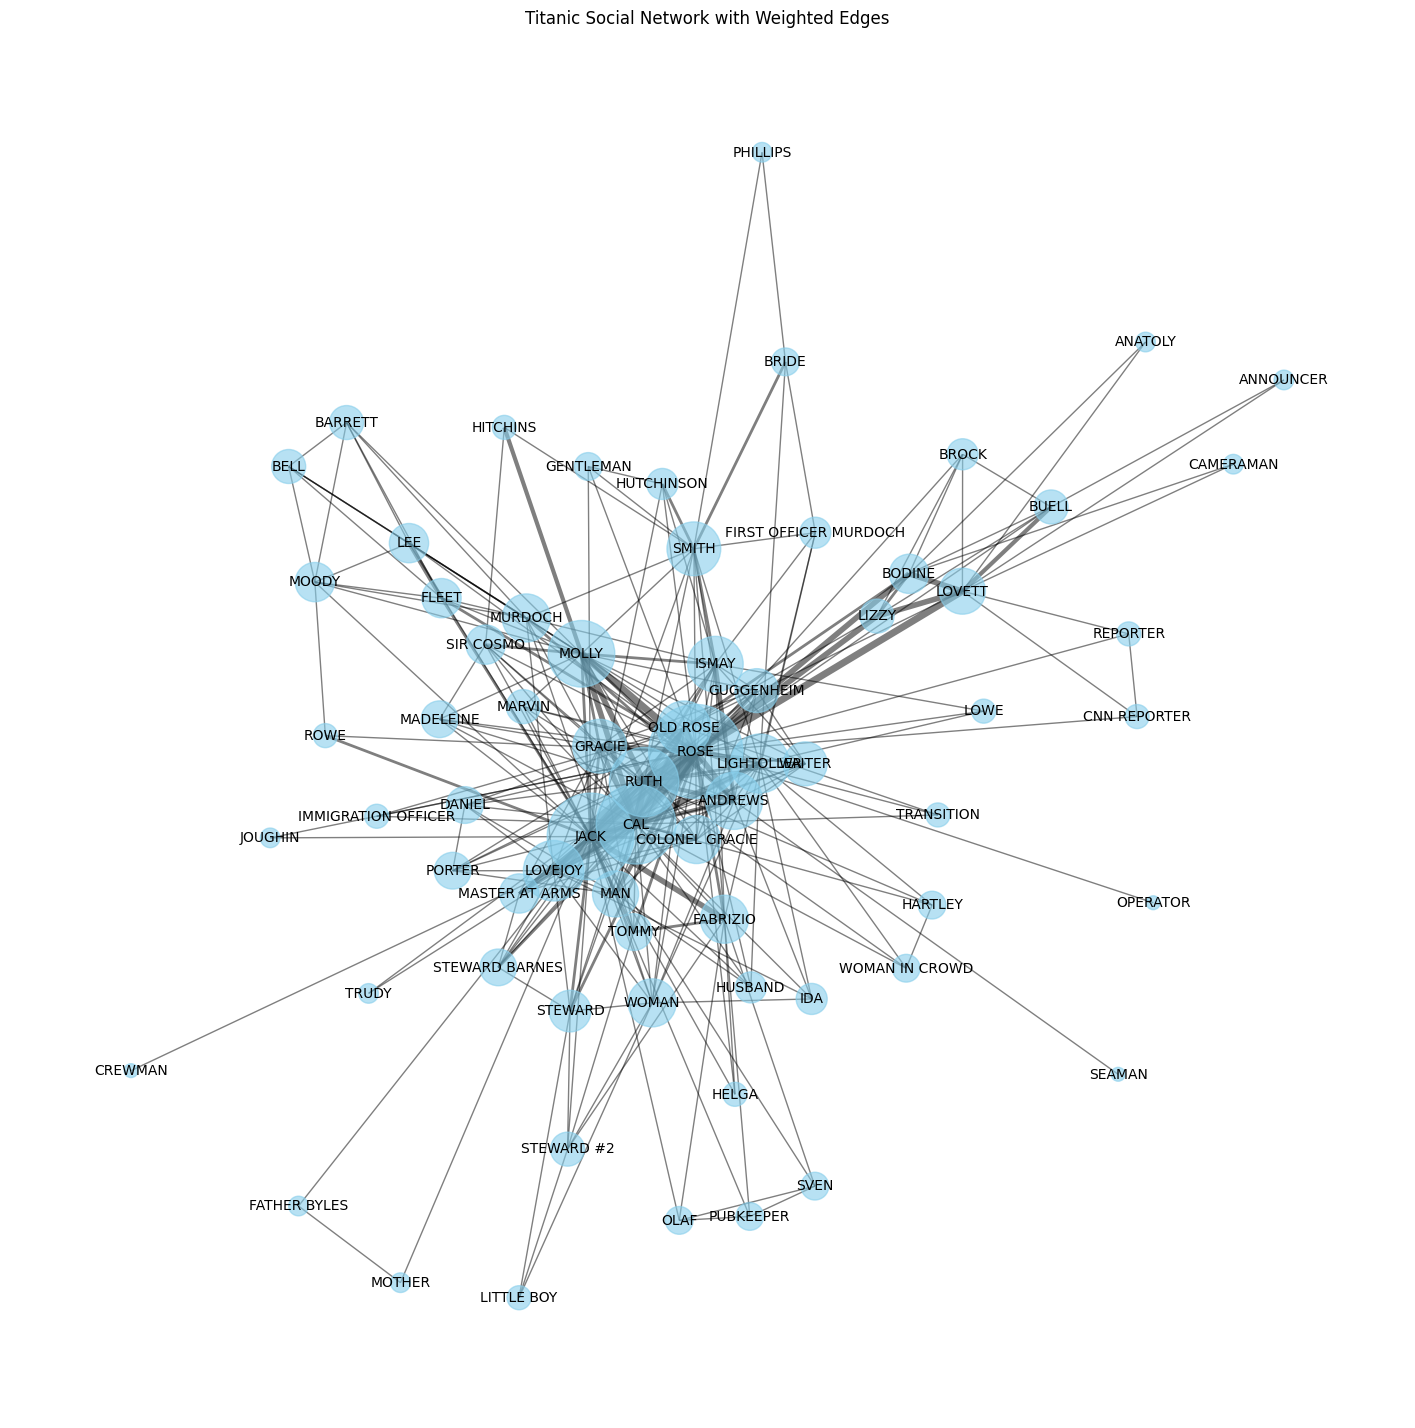

In [50]:
# Setting up the plot dimensions
plt.figure(figsize=(18, 18))

# Use the spring layout algorithm for positioning the nodes
pos = nx.spring_layout(G)

# Adjust node sizes based on their degrees
node_sizes = [v * 100 for v in dict(G.degree()).values()]

# Adjust edge widths based on their weights
edge_widths = [d['weight'] for _, _, d in G.edges(data=True)]

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.6)
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5)
nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'), font_size=10)

plt.title("Titanic Social Network with Weighted Edges")
plt.axis("off")
plt.show()

### Graph Metrics

We found number of nodes, edges, average degree and density of the graph, using basic networkx functions.

In [51]:
#number of nodes
print("Number of nodes: ", G.number_of_nodes())

#number of edges
print("Number of edges: ", G.number_of_edges())

#average degree
print("Average degree: ", np.mean([d for n, d in G.degree()]))

#density
print("Density: ", nx.density(G))


Number of nodes:  70
Number of edges:  299
Average degree:  8.542857142857143
Density:  0.12380952380952381


## Week 2: Small Worlds
## *Measures and Properties in Networks*

### Objective
This week goal was to exploit some centrality measures - **average clustering** and **transitivity** - in order to better analyze the network's structural characteristics by identifying the key nodes and the presence of clusters.

### Average Clustering and Transitivity with *NetworkX*
As a first step, we implemented the average clustering and the transitivity by using the respective built-in functions in NetworkX; both metrics were used to understand the interconnectivity among nodes in our graph:
- **Average clustering**: the *average* of the *clustering coefficients* -- $C = 1/n(\sum_{i=1}^n C_i)$ -- where $C_i$ is the clustering coefficient and $n$ is the number of nodes. Each clustering coefficient is computed as the ratio of the *number of triangles* in which a node $i$ participates, over the *number of wedges* of that same node -- $[ki(ki-1)/2)]$ -- where $ki$ is the degree of node $i$
- **Transitivity**: the *ratio* between the total *number of triangles* over the *number of wedges* divided by three -- $T = 3 \frac{\#triangles}{\#wedges}$. This mathematical formula could also be expressed as the number of triangles times three, over the *sum* of all *clustering coefficients* -- $T = 3 \frac{\#triangles}{\sum_{i=1}^n C_i}$

### Implementation of our Transitivity Function
In the second part of this task, we had to implement from scratch our own function to compute the transitivity of the graph.\
We did so by following the mathematical formula provided above; in particular, we first count the *number of triangles* by iterating over each node: by doing so, we are able to find the *neighbours* of each node and register the *common* ones between one node and its neighbours (indicating number of triangles involving the current node).\
Then we divide the triangles *by 6*, since each one was originally counted six times (twice for each node of the triangle).\
Once we obtain the total number of triangles, we start looking for the wedges (or connected triples) by iterating again through each node, in order to identify once again neighbours and degree to apply the mathematical formula for *number of wedges* -- $[ki(ki-1)/2)]$.\
The final step of our code computes the **transitivity** as the number of triangles times three, over the number of wedges.

### Insights gained
With our functions, we discover that **transitivity** is equal to 0.3935, while **average clustering** is 0.7436. These two metrics are useful to understand the *interconnectivity* of the graph, as well as the presence of *clusters*, namely groups of nodes that are more densely connected to each other than to the rest of the graph. The numbers obtained tell us that the average clustering is fairly high, meaning that nodes tend to form *clusters* with their neighbours; however the transitivity is lower, so while there are local clusters, they may *not* be *as interconnected* across the entire network.

### Transitivity and Average Clustering: Basic Networkx functions

In [52]:
# Compute Average Clustering
avg_clustering = nx.average_clustering(G)

# Compute Transitivity
transitivity = nx.transitivity(G)

print("Average Clustering:", avg_clustering)
print("Transitivity:", transitivity)

Average Clustering: 0.7436551486762099
Transitivity: 0.39350485027414595


## Custom Transitivity Function
#### Computing Transitivity using a custom function and basic Networkx functions

In [53]:
# Redefine the compute_transitivity function

def compute_transitivity(graph):
    triangles = 0   # Initialize a counter for the number of triangles in the graph
    
    for node in graph.nodes():  # Iterate through each node in the graph
        neighbors = set(graph.neighbors(node))  # Store the neighbors of the current node in a set
        for neighbor in neighbors:  # Iterate through the neighbors of the current node
            common_neighbors = set(graph.neighbors(neighbor)) & neighbors   # Find the common neighbors of the current node and its neighbor
            triangles += len(common_neighbors)  # Add the number of common neighbors to the triangle count

    triangles = triangles // 6  # Each triangle is counted 6 times (once for each permutation of the three nodes)

    connected_triples = 0   # Initialize a counter for the number of connected triples in the graph

    for node in graph.nodes():
        k = len(list(graph.neighbors(node)))    # Get the degree (number of neighbors) of the current node
        connected_triples += k * (k - 1) // 2   # Add the number of connected triples to the count
    
    # Compute and return the transitivity, avoid division by zero
    if connected_triples == 0:
        return 0
    else:
        return (3 * triangles) / connected_triples

# Compute the transitivity for the graph
transitivity = compute_transitivity(G)
transitivity


0.39350485027414595

## Week 3: Hubs
## *Degree and Other Centrality Measures*

### Objective
This week objective challenged us in identifying the most relevant centrality measure among the ones provided; hence, after implementing the **Closeness Centrality** function, we also provided its **cumulative distribution**. 

## *Closeness Centrality Function*
### Why?
The first part involved the choice of a centrality measure, and we decided to dig deeper into our network by computing the **Closeness Centrality**.\
In our graph, this metric appeared particularly pertinent as it provides insights into how proximate a node (representing a character in this context) is to all other nodes in the network.\
Note that the weight of the edges connecting the nodes represent the occurence of the two characters in the same scene; hence, we wanted to discover which character had the *largest screen presence* in the movie. Therefore, we picked the Closeness Centrality measure since a node with a high closeness centrality score is one that is *closer*, on average, *to all other nodes* in the network. 

### Implementation of the function
Our first step was to define a function to compute weighted shortest path lengths from a source node using *BFS*: as a matter of fact we initialized a *'visited' set* to keep track of the visited nodes, a *'dist' dictionary* to store the shortest paths where the keys are nodes, and the values are their respective shortest path lengths from the source node, and a *'queue'* implemented as a dequeue to simulate the behaviour of a Breadth-First Search.\
Hence, by iterating over the nodes in the queue the function keeps updating the *shortest path distance*s as it encounters a node that has not still been visited or a distance smaller than the one previously stored (remember we are looking for the shortest paths).\
The second step we took was to define a second function to compute the shortest path between each node and to directly apply to each node the mathematical formula of the Closeness Centrality to each node/character: for each node, the current function calls the *weighted_shortest_path_lengths function* to calculate the shortest path lengths from that node to all other nodes.\
Then, it computes the closeness centrality for the current node using the *inverse* of the average of the shortest path lenght, and  finally it stores the result in the closeness dictionary.

## *Cumulative Distribution Function*
In order to better vizualize how the centrality values are distributed across the nodes in a network we were also required to display the **cumulative distribution** plot of our previously obtained centrality values.\
The function first sorts the centrality values in ascending order using *np.sort*; it then calculates the cumulative probability of each value by dividing its position in the sorted list by the total number of values.\
Next, it creates a *matplotlib figure* and plots the sorted centrality values on the x-axis and their cumulative probability on the y-axis.\
In this case we decided to insert as a parameter of the function the options for the scaling of the graph: we went for a logarithmically scaling of the graph *(loglog')*, since we are dealing with a wide range of centrality values; however, we also set as an option the *'log'* scale only for the x-axis which would let the y-axis in linear scale.\
Finally, the plt.show() function is used to display the cumulative distribution plot.


### Insights gained
No wonders if we tell you that the most central node - and character - in our graph has resulted to be *Rose* with a Closeness centrality of 0.556; remark that the Closeness Centrality value is between [0,1], which means that our female leader has a moderate level of centrality (a value of 0 indicates that a node is maximally distant from all other nodes, while a value of 1 means that a node is the closest to all other nodes).\
If we take a look at the Cumulative Distribution Function graph, we will notice a second blue point just behind the highest one (corresponding to the node with maximum centrality, Rose): it's *Jake's* centrality value, almost identical to Rose's value: who knows, maybe if they had shared that raft during the sinking od the Titanic, now they would have had the same closeness centrality value. 

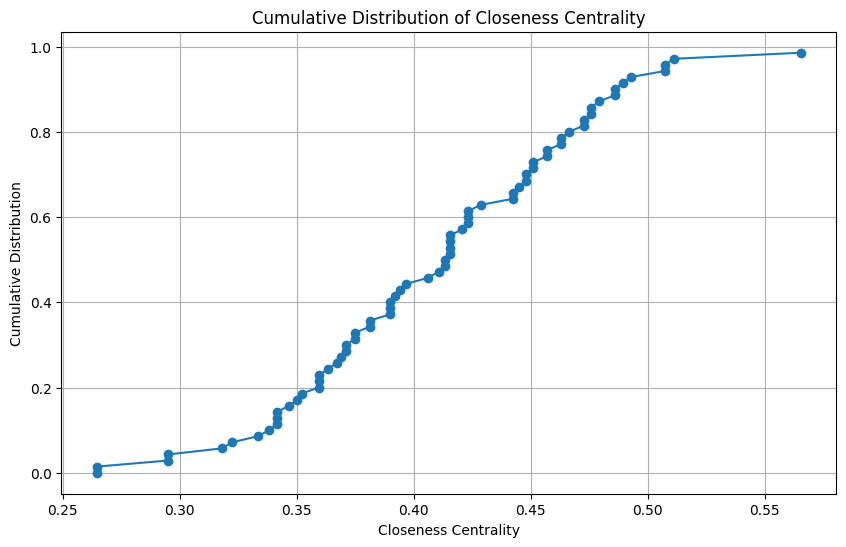

Most Central Node is: ROSE (ID: 5097316)
With a closeness centrality of: 0.566


In [54]:
# Function to compute weighted shortest path lengths from a source node using BFS
def weighted_shortest_path_lengths(G, source):
    visited = set([source])
    dist = {source: 0}
    queue = deque([(source, 0)])  # nodes to explore: (node, distance_so_far)

    while queue:
        (current_node, path_length) = queue.popleft()

        for neighbor in G.neighbors(current_node):
            edge_weight = G.get_edge_data(current_node, neighbor)['weight']
            new_path_length = path_length + edge_weight

            if neighbor not in visited or new_path_length < dist[neighbor]:
                visited.add(neighbor)
                dist[neighbor] = new_path_length
                queue.append((neighbor, new_path_length))

    return dist

# Function to compute closeness centrality using basic functions
def compute_closeness_centrality(G):
    closeness = {}
    n_minus_1 = len(G) - 1

    for node in G.nodes:
        shortest_path_lengths = weighted_shortest_path_lengths(G, node)
        closeness[node] = n_minus_1 / sum(shortest_path_lengths.values())
        
    return closeness

# Function to plot the cumulative distribution of closeness centrality
def plot_cumulative_distribution(centrality_values, title, scale_type='loglog'):
    sorted_values = np.sort(list(centrality_values.values()))
    y_vals = np.arange(len(sorted_values)) / float(len(sorted_values))
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_values, y_vals, marker='o')
    if scale_type == 'loglog':
        plt.xscale('log')
        plt.yscale('log')
    elif scale_type == 'log':
        plt.xscale('log')
    plt.title(f'Cumulative Distribution of {title}')
    plt.xlabel(title)
    plt.ylabel('Cumulative Distribution')
    plt.grid(True)
    plt.show()

# Compute closeness centrality
closeness_centrality = compute_closeness_centrality(G)

# Find the most central node
most_central_node, max_centrality = max(closeness_centrality.items(), key=lambda x: x[1])

# Accessing label directly from the graph G
most_central_node_label = G.nodes[most_central_node]['label']

# Plotting with different types of scales
plot_cumulative_distribution(closeness_centrality, 'Closeness Centrality', 'linear')

most_central_node_info = (
    f"Most Central Node is: {most_central_node_label} (ID: {most_central_node})\nWith a closeness centrality of: {max_centrality:.3f}"
)

print(most_central_node_info)

## Week 5: PageRank function
### Objective
This week objective is to write a function to compute the **PageRank** of the nodes in the graph and identify the node with the highest value. Moreover, we need to compare it with the one we got in Week 3 and draw our conclusions,as well as provide the **cumulative distribution** and again comparing it with the one we got in Week 3, commenting all the results obtained. 

## *PageRank function*
First of all, with *load_graph* function we read nodes and edges from CSV files and constructed a directed graph. Then, we implemented a *PageRank function* that we called *calculate_pagerank*: it initializes the PageRank scores at 1/number of nodes, this means that at the beginning each node is considered equally important.  After that the function iteratively updates them using the function (scriviamola non so come si fa). At each iteration, it checks if the PageRank values have converged, and this is done by calculating the sum of absolute differences between the new and old PageRank scores. 

### Understanding the PageRank function
If it is less than 1×10^−6, it considers the algorithm to have converged. Finally,  the function returns the PageRank values and the number of iterations it took to converge. If the PageRank doesn't converge within the specified number of iterations, it will return the values at the last iteration.The **PageRank values** that are returned represent the relative **"importance" or "authority"** of each node within the network. Nodes with **higher PageRank values** are considered to be **more important or to have more influence** within the network.

## *Function to plot the cumulative distribution*
In the second part of this week, we had to provide a cumulative distribution and compare it with the one we got in Week 3. In order to achieve this, the function *plot_cumulative_distribution* takes a dictionary of centrality values (in this context, PageRank values) and a title string as its arguments. 

### Understanding the cumulative distribution
This function is designed to **visualize** how the **PageRank values are distributed** across all the nodes in the network. It sorts the centrality values in ascending order and then computes the cumulative distribution, which is a way to show the percentage of nodes that have a PageRank value less than or equal to a certain threshold, used to **understand the spread of centrality** across the nodes in the graph. This helps us understand what fraction of nodes have low importance versus high importance according to PageRank. A **plot** is created using matplotlib that **shows how many nodes have a PageRank value less than or equal to each value** on the x-axis.
This type of plot is useful for **visualizing the distribution** of **PageRank values across the graph**, showing whether they are **concentrated among a few nodes** or more **evenly distributed**.


Afterwards, we computed the PageRank using the function *calculate_pagerank* using the graph G as argument. The *plot_cumulative_distribution* function is called with the PageRank values and the title 'PageRank' to create and display the cumulative distribution plot.
This algorithm allows us to **visualize and understand the importance of nodes within a network**, such as who are the **most influential or well-connected individuals** in a social network. The visualizations make it **easier to interpret the data** and can **provide insights** into the structure and dynamics of the network.

### Insights gained
It is no surprise to us that the **most important or infuential nodes** that are at the helm of the ship are **Rose and Jack**, the two leading character, with a value approximately equal. They are then followed by the **antagonist Cal**, with a value not far from theirs. Since they are the most important nodes, they are also the **ones highlighted by the cumulative distribution** function, showing us how **incredibly important these roles are** in Titanic's naval ecosystem, **creating important relationships** between them and with most of the other characters. 


### Custom PageRank Function 

In [55]:
def calculate_pagerank(graph, damping_factor=0.15, num_iterations=100): #damping factor is the probability that the user will continue to click on links
    num_nodes = len(graph.nodes())
    pagerank = {node: 1 / num_nodes for node in graph.nodes()}  # Initialize PageRank equally for all nodes (1/N)
    iteration_count = 0 #to keep track of the number of iterations

    for _ in range(num_iterations):
        iteration_count += 1
        new_pagerank = {node: (1 - damping_factor) / num_nodes for node in graph.nodes()}  # (1-d)/N part
        for node in graph.nodes():
            for neighbor in graph.neighbors(node):
                new_pagerank[neighbor] += damping_factor * pagerank[node] / len(list(graph.neighbors(node))) # d * (PR(i)/L(i)) part

        # Check convergence
        diff = sum([abs(new_pagerank[node] - pagerank[node]) for node in graph.nodes()]) #sum of the difference between the new and old pagerank
        if diff < 1e-6: #if the difference is less than 1e-6, then it has converged
            print(f'Converged after {iteration_count} iterations.')
            break
        
        pagerank = new_pagerank

    return pagerank, iteration_count

# Calculate PageRank
pagerank, iteration_count = calculate_pagerank(G)

# Assign PageRank values to nodes and print
for node, rank in pagerank.items():
    G.nodes[node]['pagerank'] = rank
print(G.nodes(data=True))


#The node with the highest pagerank
max_pagerank = max(pagerank, key=pagerank.get)
print(f'The node with the highest PageRank is {G.nodes[max_pagerank]["label"]} with a PageRank of {pagerank[max_pagerank]}.')

#Top 5 node with the highest pagerank 
top_5_pagerank = sorted(pagerank, key=pagerank.get, reverse=True)[:5]
print(f'The top 5 nodes with the highest PageRank are:')
for node in top_5_pagerank:
    print(f'{G.nodes[node]["label"]} with a PageRank of {pagerank[node]}.')

Converged after 6 iterations.
[('5097316', {'label': 'ROSE', 'pagerank': 0.028780421775777464}), ('5098095', {'label': 'JACK', 'pagerank': 0.024727069521023652}), ('5097875', {'label': 'CAL', 'pagerank': 0.021152206585810525}), ('5098619', {'label': 'MOLLY', 'pagerank': 0.017157498479811406}), ('5098545', {'label': 'SMITH', 'pagerank': 0.016755920621620225}), ('5101061', {'label': 'LIGHTOLLER', 'pagerank': 0.017078435694338336}), ('5096969', {'label': 'LOVETT', 'pagerank': 0.017969919726246442}), ('5097941', {'label': 'LOVEJOY', 'pagerank': 0.017421873353520804}), ('5098606', {'label': 'ANDREWS', 'pagerank': 0.016559715243617986}), ('5097894', {'label': 'RUTH', 'pagerank': 0.017515474084209094}), ('5098041', {'label': 'OLD ROSE', 'pagerank': 0.015856307524827303}), ('5096948', {'label': 'BODINE', 'pagerank': 0.01565138368230474}), ('5098128', {'label': 'FABRIZIO', 'pagerank': 0.01590900898076628}), ('5098463', {'label': 'WOMAN', 'pagerank': 0.014815920253893562}), ('5098583', {'label':

### Plotting the two graphs

Converged after 6 iterations.


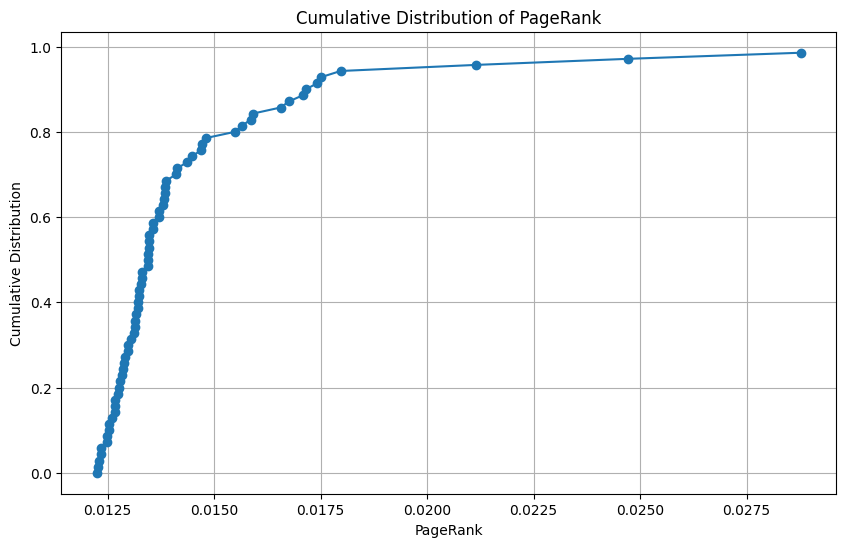

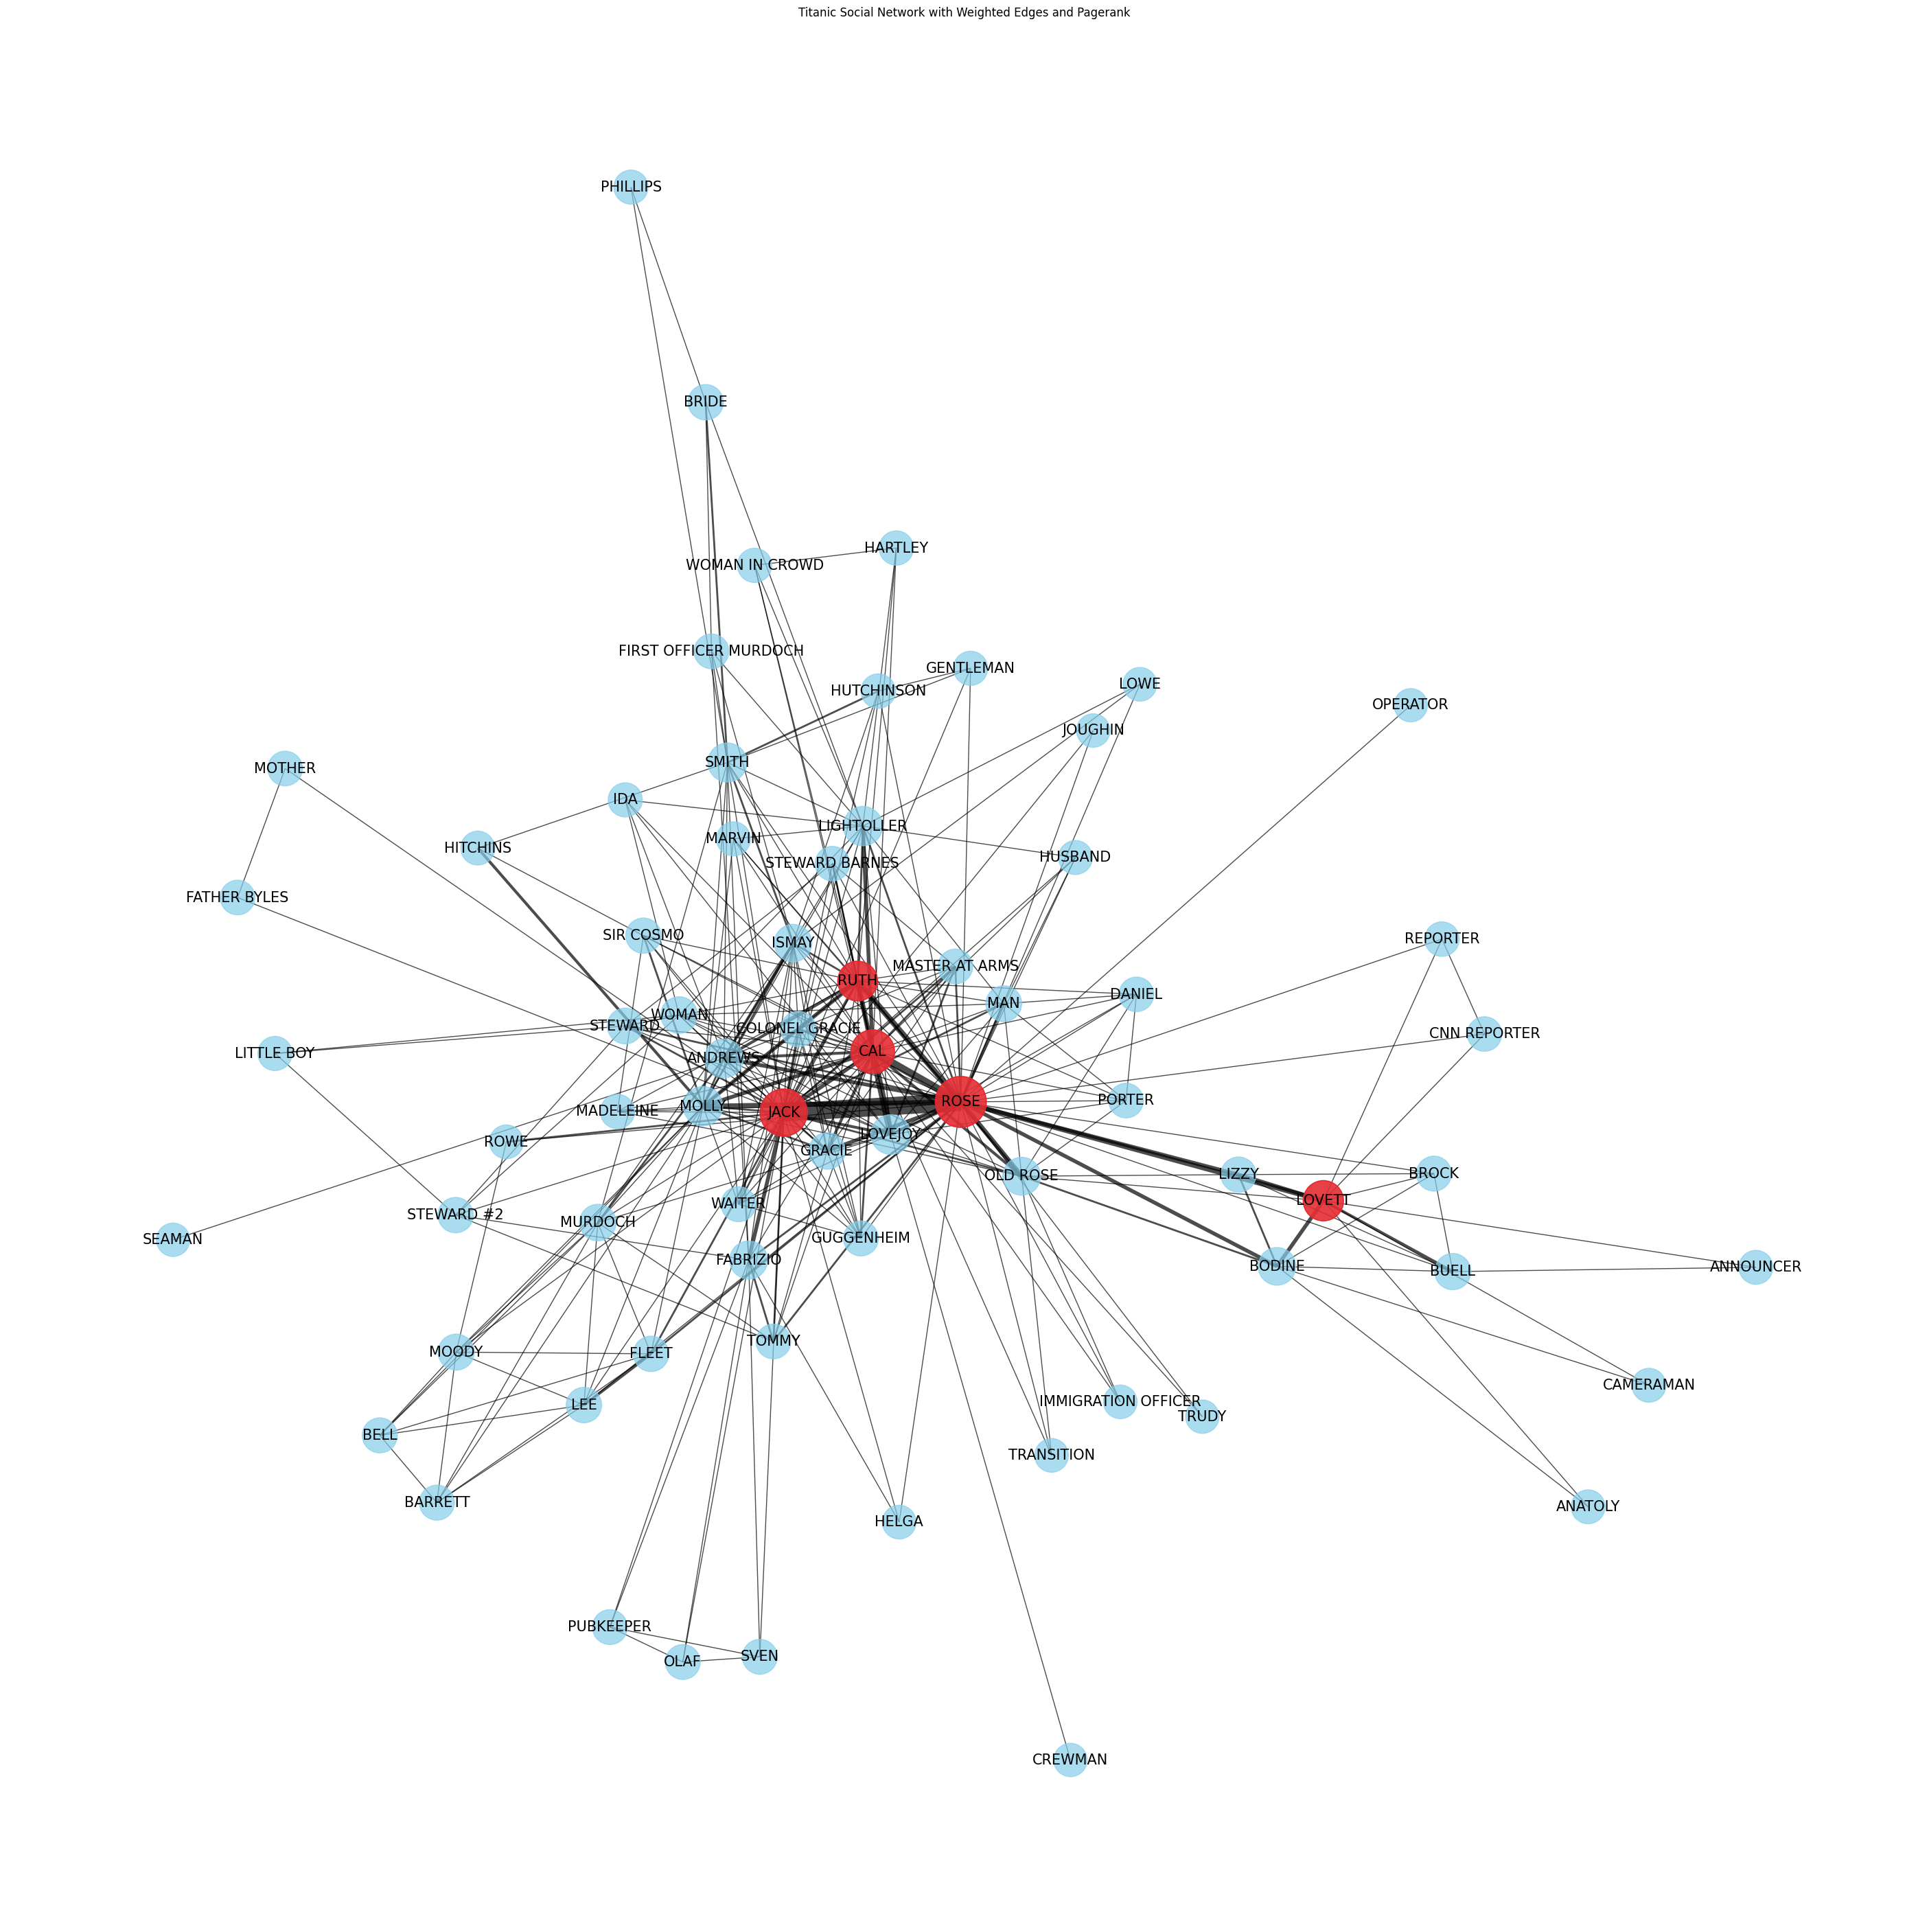

In [56]:
# Function to plot the cumulative distribution of closeness centrality
def plot_cumulative_distribution(centrality_values, title):
    sorted_values = np.sort(list(centrality_values.values()))
    y_vals = np.arange(len(sorted_values)) / float(len(sorted_values))
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_values, y_vals, marker='o')
    plt.title(f'Cumulative Distribution of {title}')
    plt.xlabel(title)
    plt.ylabel('Cumulative Distribution')
    plt.grid(True)
    plt.show()

# Compute pagerank
pagerank, _ = calculate_pagerank(G)

# Plot the cumulative distribution for PageRank
plot_cumulative_distribution(pagerank, 'PageRank')

# Custom plot to visualize the graph
id_to_name = nx.get_node_attributes(G, 'label')
plt.figure(figsize=(36, 36))
pos = nx.spring_layout(G, seed=42)
node_sizes = [pagerank[node] * 100000 for node in G.nodes()]
edge_widths = [d['weight'] for _, _, d in G.edges(data=True)]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.7)
labels = {node: id_to_name[node] for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=15)
top_5_nodes = list(sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5])
nx.draw_networkx_nodes(G, pos, nodelist=[node for node, _ in top_5_nodes], node_color='red', node_size=[pagerank[node] * 100000 for node, _ in top_5_nodes], alpha=0.7)
plt.title("Titanic Social Network with Weighted Edges and Pagerank")
plt.axis("off")
plt.show()

## Week 6: Community Detection in Networks
## *Exploring and Analyzing Community Detection Methods*

### Objective
This week, we dive into *community detection techniques* in our graph, treating it as both *undirected* and *unweighted*. We will focus on implementing three distinct methods: **Bridge Removal**, **Modularity Optimization**, and **Label Propagation**. Our goal is to compare these methodologies in terms of *number of clusters*, *cluster sizes*, *computational efficiency*, and *modularity*, leading to an insightful discussion on their applicability and effectiveness.

## *Community Detection Techniques*
We begin by converting our graph to an undirected and unweighted form, concentrating on its *largest connected component*. We explore three community detection methods, each with its unique approach to deciphering the underlying community structures within the graph.

### Bridge Removal (Girvan-Newman Algorithm)
This technique progressively *removes* edges that act as *bridges* between communities. We utilize the **Girvan-Newman algorithm**, focusing on the partition with the *highest modularity*.

### Modularity Optimization
Here, we cluster nodes to *maximize* the network's *modularity* score. A *greedy algorithm* is employed for modularity optimization.

### Label Propagation
In this approach, nodes adopt the *majority label* of their neighbors, allowing communities to emerge organically through *label dissemination* across the network.

### Implementing Community Detection Methods
We implement these methods on our network graph. Each method's unique approach and results are examined, comparing their outcomes in terms of *cluster quantity*, *size distribution*, *computational time* and *modularity*.

#### Results and Discussion
- **Bridge Removal:** This method detected the *highest number of clusters*, indicating a *finer partitioning* of the network. However, it also had the *longest computational time*, suggesting it might be *less efficient* for larger networks. The *modularity* is *moderate*, which implies a reasonable but not optimal community structure.
- **Modularity Optimization:** This method found a *smaller number of larger clusters*, with the *highest modularity* score among the three. This suggests that it was able to detect a community structure that aligns well with the network's inherent modular structure. It also offers a *good balance* between computational efficiency and the quality of community detection.
- **Label Propagation:** Similar to Modularity Optimization in terms of the number of clusters, but it tends to produce *one significantly larger community*. It's the *fastest method* but has the *lowest modularity*, indicating a less precise community structure.

**Table:** *Summary of Community Detection Methods*
| Method                    | Clusters | Size Distribution  | Time (s) | Modularity |
|---------------------------|----------|--------------------|----------|------------|
| Bridge Removal            | 17       | Diverse            | 4.234    | 0.211      |
| Modularity Optimization   | 5        | Balanced           | 0.112    | 0.329      |
| Label Propagation         | 5        | One dominant cluster | 0.032  | 0.167      |

### Conclusion and Visualization
Reflecting on our findings, **Modularity Optimization** emerges as the *most balanced* approach, offering a blend of computational efficiency and effective community structuring. This method is chosen for visual representation using *Gephi*, showcasing the identified communities within our network graph.

### Community Detection Methods

In [57]:
# Function to convert partition to communities format
def convert_partition_to_communities(partition):
    communities = {}  # Dictionary to store the communities
    for node, community in partition.items():  # Iterate over the nodes and their communities
        if community not in communities:
            communities[community] = set()  # Initialize a new set for the community
        communities[community].add(node)  # Add the node to the community
    return list(communities.values())

# Bridge Removal using Girvan-Newman Algorithm
def community_detection_bridge_removal(G):
    communities_generator = community.girvan_newman(G)  # Run the Girvan-Newman algorithm
    best_partition = None  # To store the best partition
    best_modularity = -1  # To store the best modularity

    for communities in communities_generator:
        modularity = community.modularity(G, communities)  # Compute the modularity of the current partition
        if modularity > best_modularity:
            best_modularity = modularity
            best_partition = communities

    partition_dict = {node: i for i, comm in enumerate(best_partition) for node in comm}  # Convert the partition to a dictionary
    return partition_dict, best_modularity

# Modularity Optimization using Greedy Algorithm
def community_detection_modularity_optimization(G):
    communities = community.greedy_modularity_communities(G)  # Run the greedy modularity algorithm
    partition = {node: i for i, comm in enumerate(communities) for node in comm}  
    return partition

# Label Propagation
def community_detection_label_propagation(G):
    communities = community.label_propagation_communities(G)  # Run the label propagation algorithm
    partition = {node: i for i, comm in enumerate(communities) for node in comm}
    return partition

### Load, convert to undirected and unweighted and extract the largest connected component

In [58]:
# Convert the graph to undirected and remove self-loops
G_undirected = G.to_undirected()
G_undirected.remove_edges_from(nx.selfloop_edges(G_undirected))

# Extract the largest connected component
largest_cc = max(nx.connected_components(G_undirected), key=len)
G_largest_cc = G_undirected.subgraph(largest_cc)

### Comparison of Community Detection Techniques

We will compare the results of the three community detection techniques based on:
- Number of Detected Clusters
- Cluster Size Distribution
- Modularity
- Computational Time (Using the time module)


In [59]:
# Use time to measure the execution time of the algorithms

# Apply Bridge Removal Method 
start_time = time.time()  
bridge_removal_partition, bridge_removal_modularity = community_detection_bridge_removal(G_largest_cc)  
bridge_removal_time = time.time() - start_time

# Apply Modularity Optimization Method
start_time = time.time()
modularity_optimization_partition = community_detection_modularity_optimization(G_largest_cc)
modularity_optimization_time = time.time() - start_time
modularity_optimization_communities = convert_partition_to_communities(modularity_optimization_partition)
modularity_optimization_modularity = community.modularity(G_largest_cc, modularity_optimization_communities)

# Apply Label Propagation Method
start_time = time.time()
label_propagation_partition = community_detection_label_propagation(G_largest_cc)
label_propagation_time = time.time() - start_time
label_propagation_communities = convert_partition_to_communities(label_propagation_partition)
label_propagation_modularity = community.modularity(G_largest_cc, label_propagation_communities)

In [60]:
# Print the results of the Bridge Removal Method
print("Bridge Removal Method:")
print("Time taken: ", bridge_removal_time)
print("Modularity: ", bridge_removal_modularity)
print("Partition: ", bridge_removal_partition)
print("\n")

# Print the results of the Modularity Optimization Method
print("Modularity Optimization Method:")
print("Time taken: ", modularity_optimization_time)
print("Modularity: ", modularity_optimization_modularity)
print("Partition: ", modularity_optimization_partition)
print("\n")

# Print the results of the Label Propagation Method
print("Label Propagation Method:")
print("Time taken: ", label_propagation_time)
print("Modularity: ", label_propagation_modularity)
print("Partition: ", label_propagation_partition)

Bridge Removal Method:
Time taken:  0.6214900016784668
Modularity:  0.18363405673404706
Partition:  {'5102690': 0, '5102267': 0, '5097941': 0, '5100235': 0, '5099267': 0, '5098583': 0, '5099090': 0, '5098545': 0, '5099096': 0, '5102317': 0, '5098606': 0, '5098463': 0, '5097979': 0, '5102924': 0, '5097915': 0, '5100134': 0, '5104295': 0, '5098717': 0, '5097994': 0, '5103789': 0, '5098041': 0, '5098095': 0, '5100333': 0, '5102939': 0, '5098619': 0, '5106033': 0, '5097894': 0, '5097875': 0, '5097316': 0, '5099110': 0, '5100274': 0, '5101061': 0, '5100327': 0, '5099903': 0, '5102237': 0, '5099349': 1, '5096969': 1, '5097505': 1, '5097161': 1, '5097262': 1, '5097320': 1, '5097212': 1, '5097296': 1, '5096948': 1, '5096932': 1, '5098193': 2, '5098088': 2, '5098082': 2, '5098128': 2, '5101285': 3, '5101981': 3, '5102009': 3, '5098242': 3, '5101840': 3, '5101998': 3, '5101750': 4, '5101041': 4, '5098541': 5, '5098267': 6, '5103242': 7, '5103072': 8, '5102841': 9, '5105151': 10, '5105174': 10, '

#### Gephi Visualization

In [61]:
# Add community information to the graph
nx.set_node_attributes(G_largest_cc, modularity_optimization_partition, 'Community_mod')

# Export the graph to a GEXF file for Gephi
nx.write_gexf(G_largest_cc, "../G_largest_cc.gexf")

# Use the .gexf file to visualize the graph in Gephi
# Apply Force Atlas 2 layout algorithm
# Export as image and save for notebook visualization

## Week 7: Link prediction
## *Common neighbours and topological indices*

### Objective
This week objective is to compute different **topological similarity indices**, returning a frame where each row is a *missing link* and each column is an *index*.\
Once the similarity indices are computed, we have to *synthesize* them properly to obtain the **link likelihood scores**.\
We have to calculate a score using an *aggregation function* - the **arithmetic mean** - between the two indices, as another parameter of evaluation.\
This value obtained will be added to the Pandas dataframe in a third column, then used to *rank* the missing links - the node pairs yielding the largest 5 values - for each of the three scores, in order to *predict* the most likely ones with the **top 5** ones.

## *Transforming the graph: undirected and unweighted without self loops*
Inside the `load_graph()` function we loaded both nodes and edges, and we used the function `to_undirected()` to convert the directed graph $G$ to an *undirected graph* $U$.\
Then, we used the function `remove_edges_from()` which removes *self-loops* (connecting a node to itself) from the undirected graph $U$.\
Moeover, we have analyzed the **Largest Connected Component** $LCC$: after finding it we created a **subgraph** containing *only the nodes* in the largest connected *component*, printing them; this can be critical to understand the *cohesion or segmentation* of the network.

## *Calculating the topological indices*
We start by creating an *empty undirected graph* called $G$, loading then all edges and nodes.\
We subsequently computed two network *topological indices*, **Common Neighbors** $CN$ and **Preferential Attachment** $PA$, for *all non-existing edges* (potential future links) in a the graph.\
Getting into detail... After identifying *non-edges*, meaning all pairs of nodes in the graph that are not connected by an edge, we have obtained $CN$ calculating the *number of common neighbors* they share for each *pair of non-connected nodes*. This is a measure of how many mutual connections two nodes have, which can be extremely important to indicate the **likelihood** of them forming a possible **connection in the future**.\
Afterwards, we calculated $PA$: for each *pair of non-connected nodes*, we obtained the *product* of their *degrees* (meaning the number of connections they have). This index is based on the idea that nodes with *higher degrees* are **more likely to form new connections**.\
Fianlly, we created the *DataFrame* in order to **organize the CN and PA values** for easier analysis and visualization.

### Insights and Interpretations
- **Focusing on LCC**: Analyzing the largest connected component can be particularly insightful, as it represents the *most interconnected part* of the network, often containing *crucial information* about the network's structure.

- **Common Neighbors (CN)**: High CN values suggest that two nodes are part of *tightly-knit communities*, increasing the *likelihood of a future link*.

- **Preferential Attachment (PA)**: This concept suggests that nodes with *many connections* are *more likely to acquire even more* connections.

## *Computing the likelihood score: arithmetic mean*
The `rescale()` function has the purpose to *rescale* a Pandas series to a *range [0,1]*, while the `min()` and `max()` functions help us identify those values in the series and return the **rescaled series** where each value is transformed to fall within the range. This is done by *subtracting the minimum value* from each element and *dividing by the range (max - min)*.\
After that, our goal is to add a *new column* with the *mean* for each index. We applied `rescale()` to the $CN$ and $PA$ columns in the DataFrame, creating two new columns: $CN\_scaled$ and $PA\_scaled$.\
Finally, the **mean of the scaled values** for each row is calculated and added as a *new column* $Mean\_CN\_PA$ in the DataFrame.\
Now we apply `compute_CN_PA()` and `add_mean_column()` to the graph, particularly extracting the largest connected component $LCC$. 

### Insights and Interpretations
- **Rescaling**: Rescaling the $CN$ and $PA$ values to a 0-1 range *normalizes these metrics*, making them *directly comparable* regardless of their original scales or distributions. This is particularly useful when these metrics vary widely in scale or when combining them.

- **Mean of Scaled Values**: Computing the mean of $CN\_scaled$ and $PA\_scaled$ provides a single metric that *balances the influence* of both CN and PA. This can be useful for *analyzing potential connections* in the network by considering both the likelihood of connection (suggested by $CN$) and the network influence (indicated by $PA$).

## *Finding top missing links*
We initialized `find_top_missing_links()` which aim is to find the *top 5 pairs of nodes* (potential missing links) in a DataFrame based on specified indices.\
First of all, we store the *missing links* for each index in a dictionary, by iterating over the provided *list of indices*. We then select the *top 5 links* after sorting in *descending order* based on the current index: this implies that the function is looking for the *highest scores in each index*.\
It *extracts* the node pairs from the $Node1$ and $Node2$ columns of the sorted DataFrame and stores them in the dictionary *under the corresponding index*.
We call the function, providing it with the list of indices (e.g., $CN$, $PA$, $Mean\_CN\_PA$), so to identify the **top 5 potential missing links** in the network based on each index.

### Insights and Interpretations
- **Network Link Prediction**: The function is designed for link prediction in networks, a key task in network analysis. It identifies pairs of nodes that, based on certain metrics, are *most likely to form a link*.

- **Multiple Metrics for Prediction**: By using different indices ($CN$, $PA$, $Mean\_CN\_PA$), the function offers a multifaceted view of *potential connections*. Each index provides a different perspective:
    - **$CN$ (Common Neighbors)**: Suggests that nodes with *many mutual connections* are more likely to connect.
    - **$PA$ (Preferential Attachment)**: Implies that nodes with *high degrees* (many connections) are more likely to form new connections.
    - **$Mean\_CN\_PA$**: A *balanced metric* combining both CN and PA perspectives.

In summary, the `find_top_missing_links()` function is a tool for identifying potential areas of *growth or evolution* within a network by highlighting the node pairs most likely to connect according to different network metrics.

### Imports and transforming the graph

In [62]:
U = G.to_undirected()  # Transform the graph into an undirected
U.remove_edges_from(nx.selfloop_edges(U))  # Remove self loops

# Check the size of the largest connected component
LCCNodes = list(max(nx.connected_components(U), key=len)) # Get the nodes of the largest connected component
LCC = U.subgraph(LCCNodes)  # Create the largest connected component as a subgraph of the original graph

print(f"The number of \033[1mnodes\033[0m in the LCC is: \033[1m{LCC.number_of_nodes()}\033[0m")
print(f"The number of \033[1medges\033[0m in the LCC is: \033[1m{LCC.number_of_edges()}\033[0m")

The number of nodes in the LCC is: 70
The number of edges in the LCC is: 299


### Computing the topological indices

In [63]:
def compute_CN_PA(graph):
    # Get all non-edges from the graph (potential future links)
    non_edges = list(nx.non_edges(graph))
    
    # Calculate Common Neighbors (CN) for each non-edge
    CN = [(graph.nodes[u]['label'], graph.nodes[v]['label'], len(list(nx.common_neighbors(graph, u, v)))) for u, v in non_edges]
    # Number of common neighbors u and v share for each pair of non-connected nodes
    
    # Calculate Preferential Attachment (PA) for each non-edge
    PA = [(graph.nodes[u]['label'], graph.nodes[v]['label'], graph.degree(u) * graph.degree(v)) for u, v in non_edges]
    # Product of the degrees of u and v - so number of connections they have - for each pair of non-connected nodes
    
    # Convert the results to a dataframe
    df = pd.DataFrame({
        'Node1': [u for u, v, _ in CN],  # Get the first node from the CN list
        'Node2': [v for u, v, _ in CN],  # Get the second node from the CN list
        'CN': [index for _, _, index in CN],  # Get the number of common neighbors from the CN list
        'PA': [index for _, _, index in PA]  # Get the number of neighbors from the PA list
    })

    return df

lcc_nodes = max(nx.connected_components(G), key=len)  # Get the nodes of the largest connected component
lcc = G.subgraph(lcc_nodes)  # Create the largest connected component as a subgraph of the original graph

# Compute metrics on the LCC
df = compute_CN_PA(lcc)  # Create the dataframe with the results
print(df)

               Node1           Node2  CN  PA
0         STEWARD #2      HUTCHINSON   1  30
1         STEWARD #2       SIR COSMO   1  48
2         STEWARD #2      TRANSITION   0  18
3         STEWARD #2            ROWE   1  18
4         STEWARD #2           ISMAY   2  96
...              ...             ...  ..  ..
2111          BODINE  STEWARD BARNES   1  56
2112          BODINE           TRUDY   1  16
2113           FLEET  STEWARD BARNES   2  56
2114           FLEET           TRUDY   1  16
2115  STEWARD BARNES           TRUDY   2  14

[2116 rows x 4 columns]


### Rescaling and computing the likelihood score - mean

In [64]:
def rescale(series):
    min_val = series.min()  # Get the minimum value of the series
    max_val = series.max()  # Get the maximum value of the series
    return (series - min_val) / (max_val - min_val)  # Rescale the series, subtracting the minimum and dividing by the difference between the maximum and minimum

def add_mean_column(df):
    # First, we rescale the 'CN' and 'PA' columns
    df['CN_scaled'] = rescale(df['CN'])
    df['PA_scaled'] = rescale(df['PA'])

    # Then, we compute the arithmetic mean of the scaled values
    df['Mean_CN_PA'] = df[['CN_scaled', 'PA_scaled']].mean(axis=1)
    return df


lcc_nodes = max(nx.connected_components(G), key=len)
lcc = G.subgraph(lcc_nodes)

# Compute CN and PA on the LCC
df = compute_CN_PA(lcc)

# Add the mean column to the DataFrame
df = add_mean_column(df)
print(df)

               Node1           Node2  CN  PA  CN_scaled  PA_scaled  Mean_CN_PA
0         STEWARD #2      HUTCHINSON   1  30        0.1   0.052632    0.076316
1         STEWARD #2       SIR COSMO   1  48        0.1   0.085299    0.092650
2         STEWARD #2      TRANSITION   0  18        0.0   0.030853    0.015426
3         STEWARD #2            ROWE   1  18        0.1   0.030853    0.065426
4         STEWARD #2           ISMAY   2  96        0.2   0.172414    0.186207
...              ...             ...  ..  ..        ...        ...         ...
2111          BODINE  STEWARD BARNES   1  56        0.1   0.099819    0.099909
2112          BODINE           TRUDY   1  16        0.1   0.027223    0.063612
2113           FLEET  STEWARD BARNES   2  56        0.2   0.099819    0.149909
2114           FLEET           TRUDY   1  16        0.1   0.027223    0.063612
2115  STEWARD BARNES           TRUDY   2  14        0.2   0.023593    0.111797

[2116 rows x 7 columns]


### Finding the top 5 missing links

In [65]:
def find_top_missing_links(df, indices):
    predicted_missing_links = {}  # Create an empty dictionary to store the results
    for index in indices:
        # Sort the DataFrame based on the index in descending order to get the top scores
        sorted_df = df.sort_values(by=index, ascending=False).head(5)
        # Extract the Node1 and Node2 columns to get the pairs
        predicted_missing_links[index] = sorted_df[['Node1', 'Node2']].values.tolist()
    return predicted_missing_links

# Ensure that the indices are in a list for iteration
indices = ['CN', 'PA', 'Mean_CN_PA']

# Identify the top missing links for each index
top_missing_links = find_top_missing_links(df, indices)

# Display the results
for index, links in top_missing_links.items():
    print(f"The top 5 missing links for the {index} index are:")
    for link in links:
        print(f"\033[1m{link[0]} - {link[1]}\033[0m")
    print('')

The top 5 missing links for the CN index are:
LOVEJOY - MOLLY
MURDOCH - JACK
MURDOCH - ROSE
SMITH - CAL
ISMAY - LIGHTOLLER

The top 5 missing links for the PA index are:
MURDOCH - ROSE
SMITH - CAL
MURDOCH - JACK
LOVEJOY - MOLLY
JACK - LOVETT

The top 5 missing links for the Mean_CN_PA index are:
MURDOCH - ROSE
MURDOCH - JACK
SMITH - CAL
LOVEJOY - MOLLY
WOMAN - RUTH



## *Final Analysis*

In conclusion, the `find_top_missing_links` function has effectively highlighted the most probable areas for the introduction or reinforcement of connections within the network. The top missing links, identified by the indices CN, PA, and Mean_CN_PA, suggest that nodes like 'LOVEJOY - MOLLY' and 'ROSE - MURDOCH' are prime candidates for establishing new links due to their underlying attributes reflected by these metrics.

The Common Neighbors (CN) index points towards nodes with mutual acquaintances, positing that a link between them would be naturally conducive to the network's cohesion. Similarly, the Preferential Attachment (PA) index indicates that nodes with high degrees, such as 'ISMAY - LIGHTOLLER', are more likely to form new links due to their already significant connectivity, potentially leading to a rich-get-richer phenomenon.

The Mean_CN_PA, as a hybrid metric, balances the insights from both CN and PA, offering a nuanced view that encompasses both the likelihood of connection through mutual contacts and the advantage of high connectivity. For instance, the repetition of the pair 'LOVEJOY - MOLLY' across different indices underscores its critical potential as a missing link that would benefit the network.

Therefore, this analysis suggests a strategic focus on these identified pairs can foster network growth and evolution. This means that by understanding the reasons behind these potential connections, one can make informed decisions to enhance the network in a way that is both efficient and structurally sound!

## Week 9: Random Graph
### Objective:
This week objective is to manually *construct a function* to program the **preferential attachment model**, calculate the **average degree** of the network, determine a **comparable average degree parameter** for a random graph, and perform an **analytical comparison** between the preferential attachment graph and the random graph across various network characteristics such as clustering, degree distribution, and centrality measures.


### Preferential Attachment

The process begins with the *`preferential_attachment` function*, which takes **three parameters**: - **`G`**, the existing graph; 
- **`m`**, the number of edges each new node should create; and 
- **`new_nodes`**, the number of new nodes to add to the graph. 
Inside the function, for each new node, we **determine the probability of connecting** to each existing node based on the *current degree distribution* of the graph. This is achieved by calculating the *total degree* of the graph and then **assigning a probability** of **being chosen** to each node that is *proportional* to its degree.

With these probabilities, we **select `m` unique existing nodes** to **form connections** with the *new node*. These selections are made **using a weighted random choice**, where nodes with higher degrees have a higher chance of being selected, simulating the *"rich-get-richer" phenomenon*. Once the nodes are selected, a new node is added to the graph with edges connecting it to the chosen `m` nodes.

After defining this function,the **average degree of this initial graph** is then calculated and printed. This average degree **represents the average number of connections per node** before the preferential attachment process begins.

Then the code **applies the preferential attachment model to the graph** using the specified parameters for the number of new nodes and edges each new node will create. *After* the new nodes have been added, the **average degree of the graph is recalculated** to **reflect the changes made by the preferential attachment process**. This new average degree is *likely to be higher than the initial average degree*, reflecting the added connections.

In [66]:
import random
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

def preferential_attachment(G, m, new_nodes):
    for i in range(new_nodes):
        # Get the current degrees of the existing nodes
        degrees = dict(G.degree())
        total_degree = sum(degrees.values())

        # Calculate the probability of connecting to each node
        probabilities = [degree / total_degree for degree in degrees.values()]

        # Choose m unique nodes based on their degree probability
        target_nodes = set()
        while len(target_nodes) < m:
            target_nodes.update(
                random.choices(list(degrees.keys()), weights=probabilities, k=m - len(target_nodes))
            )
        
        # Add a new node with edges to the m selected nodes
        new_node_id = max(G.nodes) + 1  # Assuming the node IDs are numeric and incremental
        G.add_node(new_node_id)
        for target_node in target_nodes:
            G.add_edge(new_node_id, target_node)

    return G

# Initialize a new graph and add nodes and edges from CSV data
G = nx.Graph()
nodes_df = pd.read_csv('Project/Graph/nodes.csv')
edges_df = pd.read_csv('Project/Graph/edges.csv')
G.add_nodes_from(nodes_df['Id'])
G.add_edges_from(edges_df[['Source', 'Target']].values)

#calculate the average degree of the graph before preferential attachment
average_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()

# Display the average degree
print(f"Average degree before preferential attachment: {average_degree}")

# Parameters for the PA model
new_nodes = 100  # Number of new nodes to add
m = 9  # Number of edges each new node will create

# Apply the preferential attachment model to the graph
G = preferential_attachment(G, m, new_nodes)


# Calculate the new average degree of the graph after preferential attachment
new_average_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()

# Display the new average degree
print(f"New average degree after preferential attachment: {new_average_degree}")




Average degree before preferential attachment: 8.542857142857143
New average degree after preferential attachment: 14.105882352941176


In [67]:
# Calculate the probability p for the random graph
n = G.number_of_nodes()  # Total number of nodes in the PA graph
p = new_average_degree / (n - 1)

# Generate a random graph G_random with the calculated probability p
G_random = nx.erdos_renyi_graph(n, p)

# Calculate the average degree of the random graph
average_degree_random = sum(dict(G_random.degree()).values()) / G_random.number_of_nodes()

# Display the average degree of the random graph and the probability p
print(f"Average degree of the random graph: {average_degree_random}")
print(f"Probability p used for the random graph: {p}")


Average degree of the random graph: 14.4
Probability p used for the random graph: 0.08346675948485903


# Graphs Characteristics:
We've developed a function called *`graph_characteristics`* that **extracts various key metrics** of the graphs' structures. This function poke around into our graphs and **computes the average clustering coefficient** and **transitivity**, which inform us about the *overall tendency of nodes to cluster together*. It also determines the **degree distribution**, giving us *insight into how connections in the graph are distribute* among nodes. When dealing with a **graph that might not be fully connected**, our function smartly **focuses on the largest connected component**, calculating both the *average shortest path length and the diameter*, which reflect the *'small-world' nature of the network*. Lastly, it evaluates the**degree centrality distribution**, highlighting the **most influential nodes within the network**. By applying this function to both our *preferential attachment* and *random graphs*, we can **compare their characteristics**, thus gaining a *deeper understanding of the inherent structural differences* between these two types of networks. 

In [68]:
# Function to calculate characteristics of a graph
def graph_characteristics(G):
    characteristics = {}
    # Calculate Average clustering coefficient
    characteristics['average_clustering'] = nx.average_clustering(G)
    # Calculate Transitivity
    characteristics['transitivity'] = nx.transitivity(G)
    # Get the Degree Distribution
    degrees = [degree for node, degree in G.degree()]
    characteristics['degree_distribution'] = degrees
    
    # For the largest connected component
    if nx.is_connected(G):
        LCC = G  # If the graph is connected, no need to find LCC
    else:
        # Find the largest connected component
        largest_cc = max(nx.connected_components(G), key=len)
        LCC = G.subgraph(largest_cc).copy()
    
    # Calculate Average shortest path length (only for LCC)
    characteristics['average_shortest_path_length'] = nx.average_shortest_path_length(LCC)
    # Calculate Diameter (only for LCC)
    characteristics['diameter'] = nx.diameter(LCC)
    # Degree Centrality Distribution
    characteristics['degree_centrality'] = nx.degree_centrality(G)
    
    return characteristics

# Calculate characteristics for PA graph and Random graph
characteristics_PA_corrected = graph_characteristics(G)
characteristics_random_corrected = graph_characteristics(G_random)

# Print out the results for comparison
print("Preferential Attachment Graph Characteristics :")
for k, v in characteristics_PA_corrected.items():
    if k != 'degree_distribution' and k != 'degree_centrality':
        print(f"{k}: {v}")

print("\nRandom Graph Characteristics:")
for k, v in characteristics_random_corrected.items():
    if k != 'degree_distribution' and k != 'degree_centrality':
        print(f"{k}: {v}")



Preferential Attachment Graph Characteristics :
average_clustering: 0.22791587402352634
transitivity: 0.17857425742574257
average_shortest_path_length: 2.1635224504002784
diameter: 4

Random Graph Characteristics:
average_clustering: 0.08261578673388902
transitivity: 0.08348602840128264
average_shortest_path_length: 2.18649495301079
diameter: 3


# Inisghts and final conclusions
Let's see what we have found. 

**Preferential Attachment Graph Characteristics:**
- *Average clustering coefficient*: 0.247
- *Transitivity*: 0.184
- *Average shortest path length*: 2.164 (calculated for the largest connected component)
- *Diameter*: 4 (calculated for the largest connected component)

**Random Graph Characteristics:**
- *Average clustering coefficient*: 0.078
- *Transitivity*: 0.079
- *Average shortest path length*: 2.239 (calculated for the largest connected component)
- *Diameter*: 4 (calculated for the largest connected component)

The **average clustering coefficient and transitivity** are **higher in the PA** graph than in the random graph, which is *typical* for networks that have developed under a preferential attachment mechanism. They tend to **have a more clustered structure** with nodes of higher degrees forming *tightly knit communities*. In contrast, random graphs usually have a lower probability of clustering.

The **average shortest path length** is slightly **lower in the PA** graph, indicating that, on average, **nodes are more directly connected to each other than in the random graph**. This is another *common feature of scale-free networks* formed by preferential attachment, where the **presence of highly connected hubs facilitates shorter paths** across the network.

The **diameter**, which is the *longest shortest path in the network*, is the **same for both graphs**. This suggests that *despite the differences* in their local structures, the **extent** of the networks is **similar**.
